In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import factorial as factorial

## Analytical solution to toy problem

### Defining the mathematical environment


Distributed features:

$
\begin{aligned}
& C \in\left\{\text { "red" } \text { "green" }\right\} \\
& \theta_1 \in[0,2 \pi) \subseteq \mathbb{R}^1 \\
& \theta_2 \in[0, \pi) \subseteq \mathbb{R}^1 \\
& \vec{x}=\left(x_1, x_2\right) \in X \subseteq \mathbb{R}^2 \\
& r_1 \in\left(2 r_2, \infty\right) \subseteq \mathbb{R}^1
\end{aligned}
$

Known distributions:

$
\begin{aligned}
& P(c)= \begin{cases}0.5, & c=\text { "red" } \\
0.5, & c=\text { "green" }\end{cases} \\
& p\left(\theta_1\right)=1 / 2 \pi \\
& p\left(\theta_2\right)=1 / \pi
\end{aligned}
$

$
p\left(r_1 \mid c\right)=\frac{\left(r_1-2 r_2\right)^{k_c-1} e^{-(r_1-2 r_2) / c}}{s^{k_c} \Gamma\left(k_c\right)}
$

$
\begin{aligned}
& k_c= \begin{cases}5, & c=\text { "red" } \\
3, & c=\text { "green" }\end{cases} \\
\end{aligned}
$

$s=$ constant

Functional dependence:

$
\begin{aligned}
& \vec{x}=\vec{g}\left(\theta_1, \theta_2, r_1\right)=\left(g_1, g_2\right)=\left(x_1, x_2\right) \\
& g_1=r_1 \cos \theta_1+r_2 \cos \left(\theta_1+\theta_2\right) \\
& g_2=r_1 \sin \theta_1+r_2 \sin \left(\theta_1+\theta_2\right)
\end{aligned}
$


See the Generating Process notebook for details of the physical setup and illustrative plots.

### Defining the goal
What we want to calculate:

$
\begin{aligned}
& p(c \mid \vec{x}) = \frac{p(c, \vec{x})}{p(\vec{x})} = \frac{1}{p(\vec{x})} \int_{2 r_2}^{\infty} \int_0^\pi \int_0^{2 \pi} p\left(c, \theta_1, \theta_2, r_1, \vec{x}\right) d \theta_1 d \theta_2 d r_1  \\
& p(\vec{x})=\sum^c \iiint p\left(c, \theta_1, \theta_2, r_1, \vec{x}\right) d \theta_1 d \theta_2 d r_1
\end{aligned}
$


$
\begin{aligned}
p\left(c, \theta_1, \theta_2, r_1, \vec{x}\right) & =p(c) \cdot p\left(\theta_1, \theta_2, r_1, \vec{x} \mid c\right) \\
& =p(c) \cdot p\left(r_1 \mid c\right) \cdot p\left(\theta_1, \theta_2, \vec{x} \mid r_1, c\right)
\end{aligned}
$

We know that $\vec{x}$ is a function of $\theta_1, \theta_2, r_1$.
If $r_1$ is constant, then $\vec{g}\left(\theta_1, \theta_2\right)$ is inversible within the bounds of $\theta_1, \theta_2$. This means that $p\left(\theta_1, \theta_2, \vec{x} \mid r_1, c\right)$ is zero everywhere except the unique solution where $x_1=g_1\left(\theta_1, \theta_2\right)$ and $x_2=g_2\left(\theta_1, \theta_2\right)$

* See further down for details on if g is actually inversible.

If $\vec{x}=\vec{g}(\vec{\theta})$ is an inversible function, we can find its distribution:
$p_{\vec{x}}(\vec{x})=p_{\vec{\theta}}\left(\vec{g}^{-1}(\vec{x})\right)\left|\overrightarrow{J}(\vec{x})\right|$

$|\vec{J}|$ is the Jacobian determinant.

This means we can calculate $\int p\left(\theta_1, \theta_2, \vec{x} \mid r_1, c\right) d \vec{\theta}$ : 

$p_{\vec{\theta}}\left(\vec{\theta} \mid r_1, c\right)=p\left(\theta_1\right) \cdot p\left(\theta_2\right)=\frac{1}{2 \pi^2}$

$\vec{g}^{-1}(\vec{x})=\vec{g}^{-1}\left(\vec{x}, r_1, c\right)$ with $r_1, c$ constant

$|\vec{J}|=\left|\vec{J}\left(\vec{x}, r_1, c\right)\right| =\gamma\left(\vec{x}, r_1, c\right)=$

$\left|\frac{\partial g_1^{-1}}{\partial x} \frac{\partial g_1^{-1}}{\partial y}\right| $ 

$\left|\frac{\partial g_2^{-1}}{\partial x} \frac{\partial g_2^{-1}}{\partial y}\right|$

$\int p\left(\theta_1, \theta_2, \vec{x} \mid r_1, c\right) d \vec{\theta}=p_x(\vec{x}) =\frac{1}{2 \pi^2} \cdot \gamma\left(\vec{x}, r_1, c\right)$


In our case, this gives us the marginal distribution:
$$
p(c, r_1, \vec{x}) = \int p\left(\theta_1, \theta_2, c, r_1, \vec{x}\right) d \vec{\theta} = p(c) \cdot \frac{\left(r_1-2 r_2\right)^{k_c} e^{-\left(r_1-2 r_2\right) / s}}{s^{k_c} \Gamma\left(k_c\right)} \cdot \frac{\gamma\left(\vec{x}, r_1, c\right)}{2 \pi^2}
$$

The values that $\int p\left(c, \theta_1, \theta_2, r_1, \vec{x}\right) d \vec{\theta}$ takes for all possible values $c_1, r_1, \vec{x}$, can then easily be calculated.


Details on the inverse solution:

$
\begin{aligned}
&g_1\left(\theta_1, \theta_2\right)=r_1 \cos \theta_1+r_2 \cos \left(\theta_1+\theta_2\right)=x \\
&g_2\left(\theta_1, \theta_2\right)=r_1 \sin \theta_1+r_2 \sin \left(\theta_1+\theta_2\right)=y \\
\\
&g_2^{-1}=\theta_2=\cos ^{-1}(\beta), \\
&\beta=\frac{x^2+y^2-\left(r_1^2+r_2^2\right)}{2 r_1 r_2}, 0 \leq \theta_2 \leq \pi \\
\end{aligned}
$

From constraints in $x, y$ we get $-1 \leq \beta \leq 1$ as $r_1-r_2 \leq \sqrt{x^2+y^2} \leq r_1+r_2$

Rough estimate gives $0 \leq a \leq \frac{r_2}{r_1+r_2}<1 / 3$

\\
$
\begin{aligned}
&g_1^{-1}=\theta_1=\left\{\begin{array}{l}
&\left.\tan ^{-1}\left(\frac{x_2}{x_1}\right)-\tan ^{-1}(\alpha), \text{ for } x_1>0, (\tan ^{-1}\left(\frac{x_2}{x_1}\right)-\tan ^{-1} (\alpha)\right)> 0 \\
&\left.\tan ^{-1}\left(\frac{x_2}{x_1}\right)-\tan ^{-1}(\alpha) + \pi, \text{ for } x_1 < 0, (\tan ^{-1}\left(\frac{x_2}{x_1}\right)-\tan ^{-1} (\alpha)\right)> 0 \\
&\left.\tan ^{-1}\left(\frac{x_2}{x_1}\right)-\tan ^{-1}(\alpha) + 2\pi, \text{ for } x_1 < 0, (\tan ^{-1}\left(\frac{x_2}{x_1}\right)-\tan ^{-1} (\alpha)\right)< 0 \\
&\end{array}\right. \\
&\alpha=\frac{r_2 \sin \left(\theta_2\right)}{r_1+r_2 \cos \left(\theta_2\right)} \quad
\end{aligned}
$


If $\tan ^{-1}\left(\frac{x_2}{x_1}\right)-\tan ^{-1}(\alpha)<0$ can be evaluated numerically obviously, so not a concern for us.

The function $g_i^{-1}$ is piecewise defined but has clear boundaries in $\theta_1, \theta_2$ space. 
Which makes the integral $\int_0^\pi \int_0^{2 \pi} p\left(\theta_1, \theta_1, \vec{x} \mid r_1, c\right) d \theta_1 d \theta_2$ a sum of integrals: 
$$
\int_0^{\pi } (\int_0^{A\left(\theta_2\right)} p\left(\theta_1, \theta_2, \vec{x} \mid r_1, c\right) d \theta_1 + \int_{A\left(\theta_2\right)}^{B\left(\theta_2\right)} p\left(\theta_1, \theta_2, \vec{x} \mid r_1, c\right) d \theta_1 + \int_{B(\theta_2)}^{2\pi} p\left(\theta_1, \theta_2, \vec{x} \mid r_1, c\right) d \theta_1) d \theta_2
$$

But in our case $p(\vec{\theta})$ is not $\vec{\theta}$ dependent and $\gamma$ is the same for A , B and C, so we don't have to worry about this.
If we want a more complicated model however, it is easy to incorperate non-uniform $\vec{\theta}$ distributions by evaluating each of these integrals separately.

## Evaluating the integral

Our final form of the integral looks like this:

$$
p(c|\vec{x}) = \frac {1}{p(\vec{x})} \int_{2r_2}^{\infty} \int_0^\pi \int_0^{2 \pi} p\left(c_1 \theta_1, \theta_2, r_1, \vec{x}\right) d \theta_2 d \theta_1 dr_1 = \frac {p(c)}{p(\vec{x})} \int_{2r_2}^{\infty} \cdot \frac{\left(r_1-2 r_2\right)^{k_c} e^{-\left(r_1-2 r_2\right) / s}}{s^{k_c} \Gamma\left(k_c\right)} \cdot \frac{\gamma\left(\vec{x}, r_1, c\right)}{2 \pi^2} dr_1
$$

With
$
p(\vec{x})=\sum^c \iiint p\left(c, \theta_1, \theta_2, r_1, \vec{x}\right) d \theta_1 d \theta_2 d r_1
$

To evaluate this numerically we must transform the integral to be finite by settin $u = \frac{1}{r_1}$ and $dr_1 = -\frac{du}{u^2}$:

$$
\int_{2r_2}^{\infty}f(r)dr = \int_{1/2r_2}^{0} f(u) \frac{-1}{u^2}du  = \int_{0}^{1/2r_2} f(u) \frac{1}{u^2}du
$$

This integral (and all its components) can be evaluated numerically.

$$
\int_{0}^{1/2r_2} p(c) \cdot \frac{\left(\frac{1}{u}-2 r_2\right)^{k_c} e^{-\left(\frac{1}{u}-2 r_2\right) / s}}{s^{k_c} \Gamma\left(k_c\right)} \cdot \frac{\gamma\left(\vec{x}, \frac{1}{u}, c\right)}{2 \pi^2} \frac{1}{u^2}du
$$

In [2]:
def alpha(a2, r1, r2):
    return (r2*np.sin(a2)/(r1+r2*np.cos(a2)))

def beta(x1, x2, r1, r2):
    return((x1**2+x2**2-(r1**2+r2**2))/(2*r1*r2))

def theta2(x1, x2, r1, r2):
    return(np.arccos(beta(x1, x2, r1, r2)))

def theta1(x1, x2, r1, r2):
    a1 = np.arctan(x2/x1)-np.arctan(alpha(theta2(x1, x2, r1, r2), r1, r2))
    a1 = np.where(x1 < 0, a1 + np.pi, a1)
    a1 = np.where(a1 < 0, a1 + 2*np.pi, a1)
    return a1

def sqrtgamma(x1, x2, r1, r2, dx=0.001):
    da1x = (theta1(x1+dx, x2, r1, r2) - theta1(x1, x2, r1, r2))
    da1y = (theta1(x1, x2+dx, r1, r2) - theta1(x1, x2, r1, r2))
    da2x = (theta2(x1+dx, x2, r1, r2) - theta2(x1, x2, r1, r2))
    da2y = (theta2(x1, x2+dx, r1, r2) - theta2(x1, x2, r1, r2))
    return(da1x*da2y/(dx**2) - da1y*da2x/(dx**2))

def pr1(r1, r2, c):
    s = 2
    if (c == "red"):
        kc = 5
    if (c == "green"):
        kc = 3
    z = 2*r2 + r1
    return(z**(kc - 1)*np.exp(-z/s)/((s**kc)*factorial(kc)))

def X(a1, a2, r1, r2):
    x1 = r1*np.cos(a1) + r2*np.cos(a1 + a2)
    x2 = r1*np.sin(a1) + r2*np.sin(a1 + a2)
    return (x1, x2)

In [479]:
def other_theta(x1, x2, r1, r2):
    x = np.sqrt(x1**2 + x2**2)
    u = 2*r1**2*(x**2+r2**2)-(x**2-r2**2)**2 -r1**4
    a1 = 2*np.arctan((2*r1*x2 - np.sqrt(u))/(x**2 + r1**2 + 2*r1*x1 - r2**2))
    a2 = -2*np.arctan((np.sqrt(u))/((r1 - r2)**2 - x**2))
    
    a1 = np.where(a1 < 0, a1 + 2*np.pi, a1)
    
    return a1, a2


In [480]:
R2 = 3
R1 = 2*R2+1

a1_value = 2
a2_value = 0.5

# Maps to x1, x2:
x1_value, x2_value = X(a1_value, a2_value, R1, R2)
print("angles", a1_value, a2_value, "maps to coordinates ", x1_value, x2_value)

#Does it map back?
a1_other_solution, a2_other_solution = other_theta(x1_value, x2_value, R1, R2)
print("other solution: coordinates",  x1_value, x2_value, "maps to angles ", a1_other_solution, a2_other_solution)
a1_aurora_solution, a2_aurora_solution = theta1(x1_value, x2_value, R1, R2), theta2(x1_value, x2_value, R1, R2)
print("Aurora solution: coordinates",  x1_value, x2_value, "maps to angles ", a1_aurora_solution, a2_aurora_solution)

angles 2 0.5 maps to coordinates  -5.316458702470798 8.160498420091642
other solution: coordinates -5.316458702470798 8.160498420091642 maps to angles  3.1240359626735517 0.49999999999999795
Aurora solution: coordinates -5.316458702470798 8.160498420091642 maps to angles  2.0 0.49999999999999944


Text(0, 0.5, 'x2')

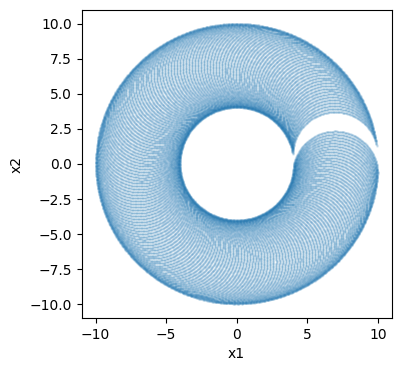

In [451]:
# Look at the mapping function for constant R
nx = 200
#angles
margin = 0.1
a1 = np.linspace(margin, 2*np.pi - margin, nx)
a2 = np.linspace(margin, np.pi - margin, nx)

x1, x2 = X(a1, a2, R1, R2)

aa1, aa2 = np.meshgrid(a1, a2)
xx1, xx2 = X(aa1, aa2, R1, R2)
test_aa1, test_aa2 = theta1(xx1, xx2, R1, R2), theta2(xx1, xx2, R1, R2)
other_aa1, other_aa2 = other_theta(xx1, xx2, R1, R2)
other_a1, other_a2 = other_theta(x1, x2, R1, R2)
test_a1, test_a2 = theta1(x1, x2, R1, R2), theta2(x1, x2, R1, R2)
sqrtgamma_num = sqrtgamma(xx1, xx2, R1, R2)

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (4, 4))

ax.scatter(xx1, xx2, s=1, alpha=0.1)
ax.set_xlabel("x1")
ax.set_ylabel("x2")

Text(0, 0.5, 'a2')

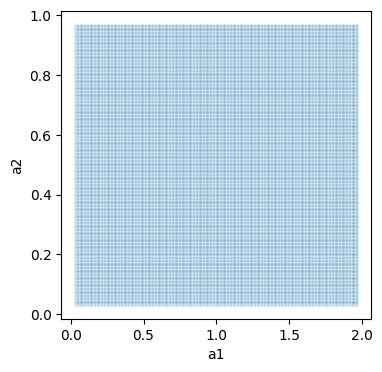

In [452]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (4, 4))

ax.scatter(aa1/np.pi, aa2/np.pi, s=1, alpha=0.1)
ax.set_xlabel("a1")
ax.set_ylabel("a2")

Text(0, 0.5, 'a2')

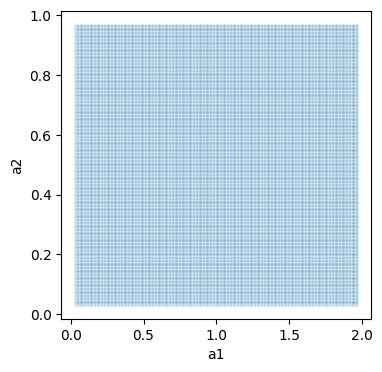

In [453]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (4, 4))

ax.scatter(test_aa1/np.pi, test_aa2/np.pi, s=1, alpha=0.1)
ax.set_xlabel("a1")
ax.set_ylabel("a2")

Text(0, 0.5, 'a2')

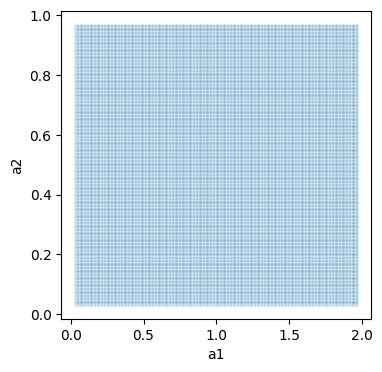

In [454]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (4, 4))

ax.scatter(other_aa1/np.pi, other_aa2/np.pi, s=1, alpha=0.1)
ax.set_xlabel("a1")
ax.set_ylabel("a2")

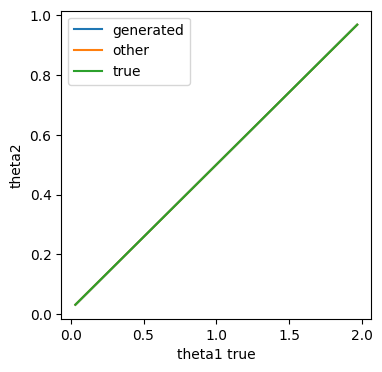

In [455]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (4, 4))
ax.plot(a1/np.pi, a2/np.pi, label = "generated")
ax.plot(a1/np.pi, other_a2/np.pi, label = "other")
ax.plot(a1/np.pi, test_a2/np.pi, label ="true")
ax.set_ylabel("theta2")
ax.set_xlabel("theta1 true")
ax.legend()

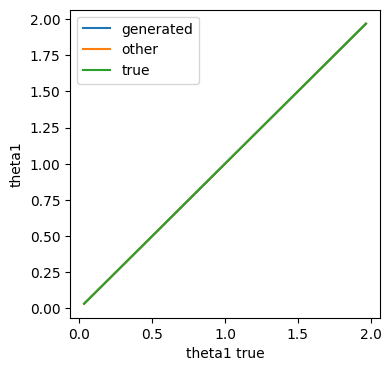

In [456]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (4, 4))
ax.plot(a1/np.pi, a1/np.pi, label = "generated")
ax.plot(a1/np.pi, other_a1/np.pi, label = "other")
ax.plot(a1/np.pi, test_a1/np.pi, label ="true")
ax.set_ylabel("theta1")
ax.set_xlabel("theta1 true")
ax.legend()

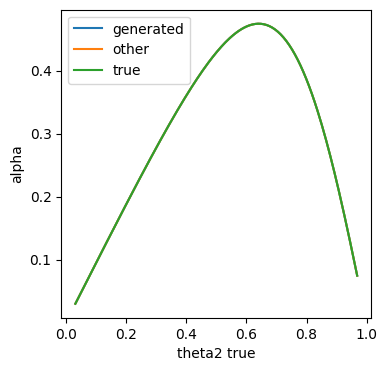

In [457]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (4, 4))
ax.plot(a2/np.pi, alpha(test_a2, R1, R2), label = "generated")
ax.plot(a2/np.pi, alpha(other_a2, R1, R2), label = "other")
ax.plot(a2/np.pi, alpha(a2, R1, R2), label ="true")
ax.set_ylabel("alpha")
ax.set_xlabel("theta2 true")
ax.legend()

1.2870450837764607


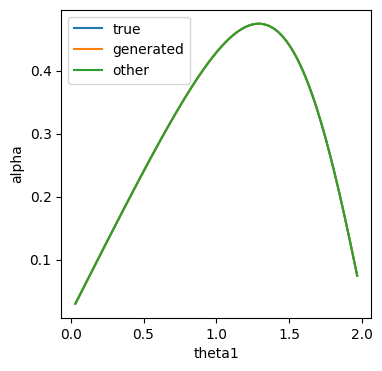

In [458]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (4, 4))
ax.plot(a1/np.pi, alpha(a2, R1, R2), label ="true")
ax.plot(test_a1/np.pi, alpha(test_a2, R1, R2), label = "generated")
ax.plot(other_a1/np.pi, alpha(other_a2, R1, R2), label = "other")
#ax.plot(np.where(test_a1/np.pi < 0, test_a1/np.pi + 2, test_a1/np.pi), alpha(test_a2, R1, R2), label = "generated")
ax.set_ylabel("alpha")
ax.set_xlabel("theta1")
ax.legend()
print(test_a1[np.argmax(alpha(a2, R1, R2))]/np.pi)

1.2870450837764607


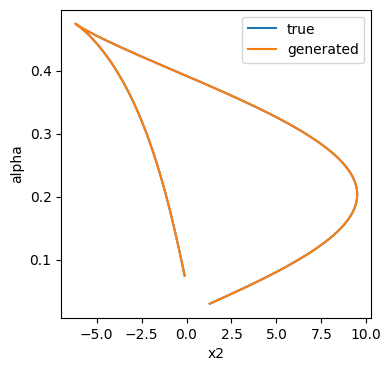

In [459]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (4, 4))
ax.plot(x2, alpha(a2, R1, R2), label ="true")
ax.plot(x2, alpha(test_a2, R1, R2), label = "generated")
#ax.plot(np.where(test_a1/np.pi < 0, test_a1/np.pi + 2, test_a1/np.pi), alpha(test_a2, R1, R2), label = "generated")
ax.set_ylabel("alpha")
ax.set_xlabel("x2")
ax.legend()
print(test_a1[np.argmax(alpha(a2, R1, R2))]/np.pi)

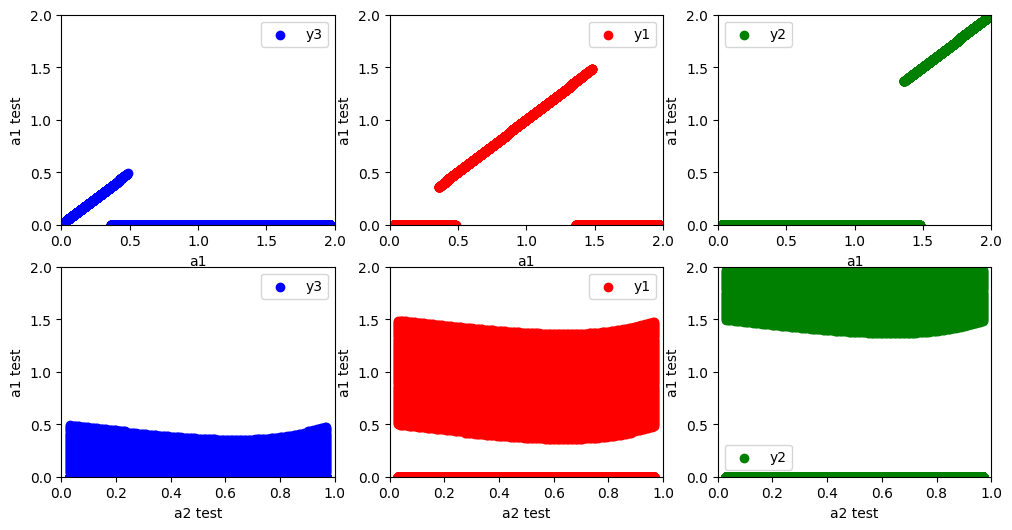

In [460]:
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (12, 6))
yy = np.arctan(xx2/xx1)-np.arctan(alpha(theta2(xx1, xx2, R1, R2), R1, R2))
yy1 = np.where(xx1 < 0, yy + np.pi, yy)
yy2 = np.where(yy1 < 0, yy1 + 2*np.pi, 0)
yy1 = np.where(xx1 < 0, yy + np.pi, 0)
yy3 = np.where(xx1 < 0, 0, yy)
yy3 = np.where(yy3 < 0, 0, yy3)
ax[0][1].scatter(aa1/np.pi, yy1/np.pi, label ="y1", color="red")
ax[0][2].scatter(aa1/np.pi, yy2/np.pi, label ="y2", color="green")
ax[0][0].scatter(aa1/np.pi, yy3/np.pi, label ="y3", color="blue")
ax[1][1].scatter(test_aa2/np.pi, yy1/np.pi, label ="y1", color="red")
ax[1][2].scatter(test_aa2/np.pi, yy2/np.pi, label ="y2", color="green")
ax[1][0].scatter(test_aa2/np.pi, yy3/np.pi, label ="y3", color="blue")

for axis in ax[0]:
    axis.set_ylabel("a1 test")
    axis.set_xlabel("a1")
    axis.legend()
    axis.set_xlim(0, 2)
    axis.set_ylim(0, 2)

for axis in ax[1]:
    axis.set_ylabel("a1 test")
    axis.set_xlabel("a2 test")
    axis.legend()
    axis.set_xlim(0, 1)
    axis.set_ylim(0, 2)

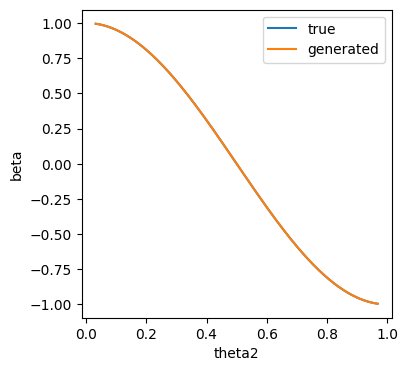

In [461]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (4, 4))
ax.plot(a2/np.pi, beta(x1, x2, R1, R2), label ="true")
ax.plot(test_a2/np.pi, beta(x1, x2, R1, R2), label = "generated")
ax.set_ylabel("beta")
ax.set_xlabel("theta2")
ax.legend()

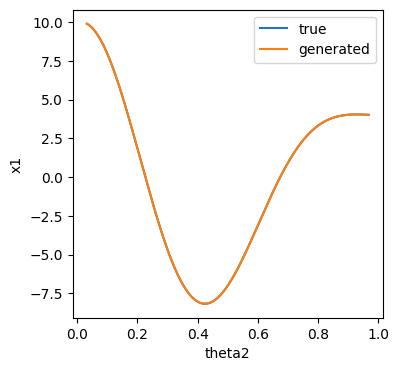

In [462]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (4, 4))
ax.plot(a2/np.pi, x1, label ="true")
ax.plot(test_a2/np.pi, x1, label = "generated")
ax.set_ylabel("x1")
ax.set_xlabel("theta2")
ax.legend()

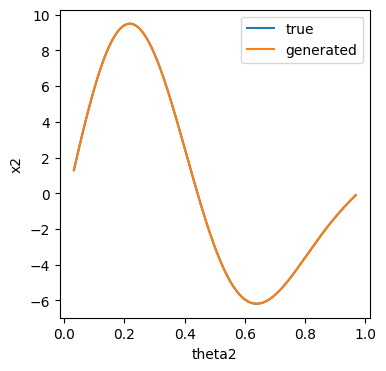

In [463]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (4, 4))
ax.plot(a2/np.pi, x2, label ="true")
ax.plot(test_a2/np.pi, x2, label = "generated")
ax.set_ylabel("x2")
ax.set_xlabel("theta2")
ax.legend()

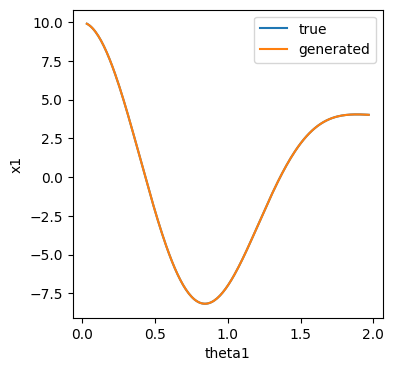

In [464]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (4, 4))
ax.plot(a1/np.pi, x1, label ="true")
ax.plot(test_a1/np.pi, x1, label = "generated")
ax.set_ylabel("x1")
ax.set_xlabel("theta1")
ax.legend()

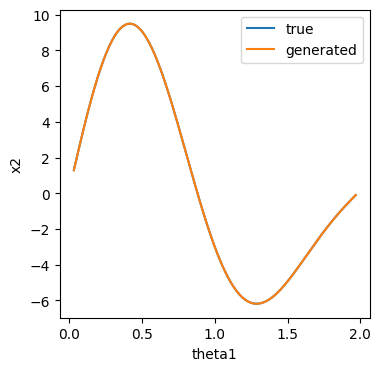

In [465]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (4, 4))
ax.plot(a1/np.pi, x2, label ="true")
ax.plot(test_a1/np.pi, x2, label = "generated")
ax.set_xlabel("theta1")
ax.set_ylabel("x2")
ax.legend()

Text(0, 0.5, 'theta1_test')

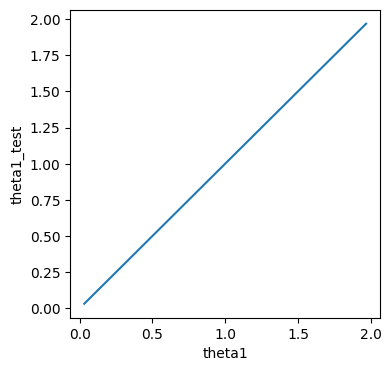

In [466]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (4, 4))
ax.plot(a1/np.pi, test_a1/np.pi, label ="true")
ax.set_xlabel("theta1")
ax.set_ylabel("theta1_test")

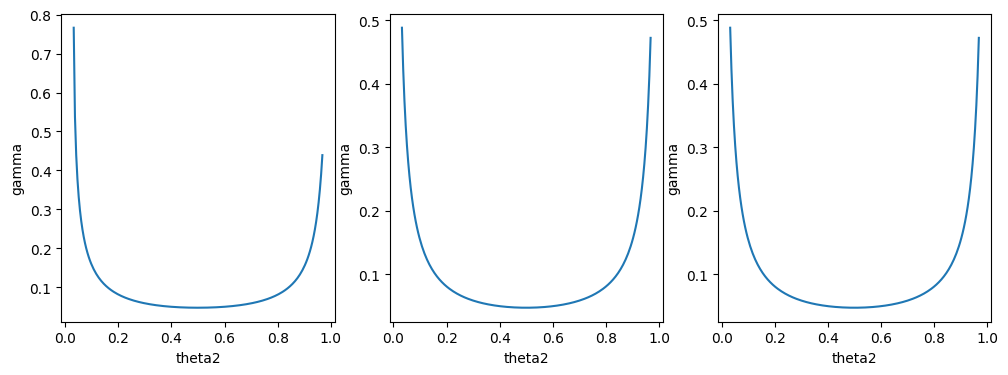

In [467]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (12, 4))
dxs = [0.01, 0.001, 0.001]
i = 0
for ax in axes:
    sqrtgamma_num = sqrtgamma(x1, x2, R1, R2, dxs[i])
    i = i + 1
    ax.plot(a2/np.pi, sqrtgamma_num)
    ax.set_xlabel("theta2")
    ax.set_ylabel("sqrtgamma")

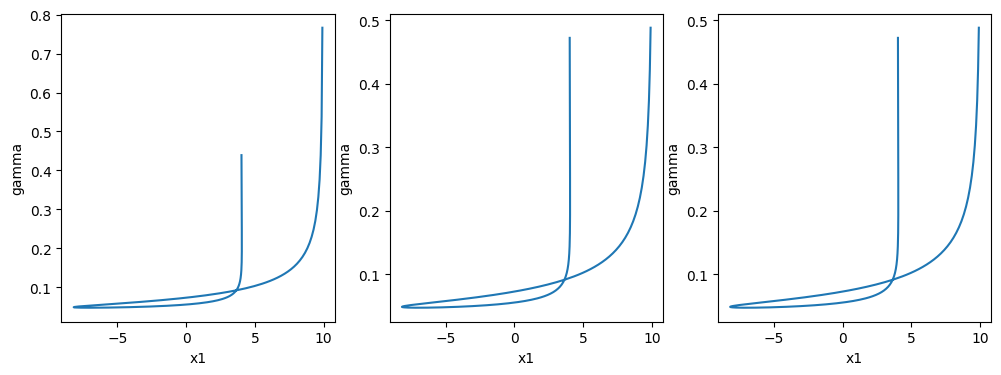

In [468]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (12, 4))
dxs = [0.01, 0.001, 0.001]
i = 0
for ax in axes:
    sqrtgamma_num = sqrtgamma(x1, x2, R1, R2, dxs[i])
    i = i + 1
    ax.plot(x1, sqrtgamma_num)
    ax.set_xlabel("x1")
    ax.set_ylabel("sqrtgamma")

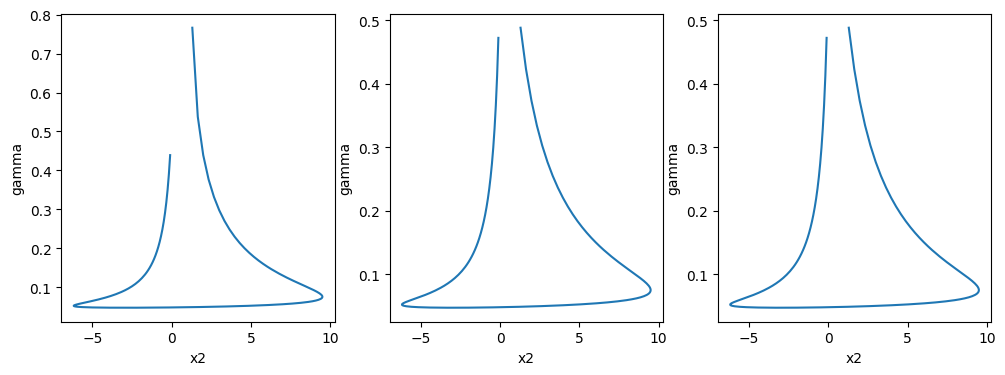

In [469]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (12, 4))
dxs = [0.01, 0.001, 0.001]
i = 0
for ax in axes:
    sqrtgamma_num = sqrtgamma(x1, x2, R1, R2, dxs[i])
    i = i + 1
    ax.plot(x2, sqrtgamma_num)
    ax.set_xlabel("x2")
    ax.set_ylabel("sqrtgamma")

C:\Users\Aurora\AppData\Local\Temp\ipykernel_7700\3604165110.py:8: RuntimeWarning: invalid value encountered in arccos
  return(np.arccos(beta(x1, x2, r1, r2)))


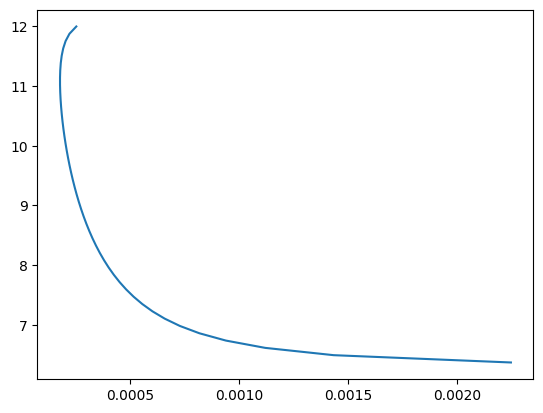

In [470]:
rs = np.linspace(2*R2, 4*R2)
y = sqrtgamma(x1[50], x2[50], rs, R2)*pr1(rs, R2, "red")
plt.plot(y, rs)